In [2]:
import MeCab
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["font.family"] = "IPAexGothic"

from sklearn.model_selection import train_test_split
import random

## 第50問

In [3]:
data = pd.read_table("NewsAggregatorDataset/newsCorpora.csv",header = None)
#列の単位がついていないのでつけてあげる
data.columns = ["ID","TITLE","URL","PUBLISHER","CATEGORY","STORY","HOSTNAME","TIMESTAMP"]
data_use = data["PUBLISHER"]
data_use.head(5)

0    Los Angeles Times
1             Livemint
2         IFA Magazine
3         IFA Magazine
4            Moneynews
Name: PUBLISHER, dtype: object

In [4]:
data = pd.read_table("NewsAggregatorDataset/newsCorpora.csv",header = None)
#列の単位がついていないのでつけてあげる
data.columns = ["ID","TITLE","URL","PUBLISHER","CATEGORY","STORY","HOSTNAME","TIMESTAMP"]

#列の要素が渡したリスト内にあるかどうかを検索するisin関数
data_use = data[data["PUBLISHER"].isin(["Reuters","Huffington Post","Businessweek","Contactmusic.com","Daily Mail"])]

#ランダムに選択するのは、sample(重複なし) or choices(重複あり)
#pd内には、sampleがある
#samoleの引数は、n(個数),frac(割合,1で100%),random_state(乱数シードの値),replace(重複可不可)
data_use_sample = data_use.sample(frac=1,random_state=0)


#記事見出しとカテゴリ名だけをテストデータにするので、そこだけ取ってくる
X = data[["TITLE","CATEGORY"]]

Y = data["CATEGORY"]

#DataFrameではなく、文字列型なので、map関数を使う必要がある？
X["CATEGORY"] = X["CATEGORY"].map({"b":0,"t":1,"e":2,"m":3})


#trainとtestを8:2で分ける
X_train,X_test = train_test_split(X,test_size=0.2,random_state=0)

Y_train,Y_test = train_test_split(Y,test_size=0.2,random_state=0)

#testとvalidを1:1で分ける
#そうすれば、train:test:valid = 8:1:1

X_test,X_valid = train_test_split(X_test,test_size=0.5,random_state=0)

Y_test,Y_valid = train_test_split(Y_test,test_size=0.5,random_state=0)

#区切り文字sep="\t",indexは外してok,headerもいらない。
X_train.to_csv("Part6_Result/train.txt",columns = ["TITLE","CATEGORY"] ,sep="\t",index=False)

X_valid.to_csv("Part6_Result/valid.txt",columns = ["TITLE","CATEGORY"] ,sep="\t",index=False)

X_test.to_csv("Part6_Result/test.txt",columns = ["TITLE","CATEGORY"], sep="\t",index=False)

c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## 第51問

In [5]:
#特徴量抽出のライブラリをインポート
#tf-idf抽出はまた今度
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import scipy as spy
from scipy.io import mmwrite, mmread

In [6]:
#toarray()などしているサイトが多いが、スパース(疎)⇒密の変換は
#メモリ不足となってしまうので、スパース行列のまま保存

X_train = pd.read_table("Part6_Result/train.txt")
X_valid = pd.read_table("Part6_Result/valid.txt")
X_test = pd.read_table("Part6_Result/test.txt")

vectorizer = CountVectorizer()
tfidf = TfidfVectorizer()

#単語ベクトル化？

X_train_vec = vectorizer.fit_transform(X_train["TITLE"])
X_valid_vec = vectorizer.transform(X_valid["TITLE"])
X_test_vec = vectorizer.transform(X_test["TITLE"])

#tf-idfの値を抽出

X_train_tfidf = tfidf.fit_transform(X_train["TITLE"])
X_valid_tfidf = tfidf.transform(X_valid["TITLE"])
X_test_tfidf = tfidf.transform(X_test["TITLE"])

#.mtxファイルになってしまうが、このまま引き続き学習させて行くのでいったん無視

mmwrite("Part6_Result/train_vec.feature.txt",X_train_vec)
mmwrite("Part6_Result/valid_vec.feature.txt",X_valid_vec)
mmwrite("Part6_Result/test_vec.feature.txt",X_test_vec)
mmwrite("Part6_Result/train_tfidf.feature.txt",X_train_tfidf)
mmwrite("Part6_Result/valid_tfidf.feature.txt",X_valid_tfidf)
mmwrite("Part6_Result/test_tfidf.feature.txt",X_test_tfidf)

print(type(X_train_vec))

<class 'scipy.sparse.csr.csr_matrix'>


## 第52問

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
#学習
LR_vec = LogisticRegression()

Y = X_train["CATEGORY"]

LR_vec.fit(X_train_vec,Y)

c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
#学習
#tfidfでやる場合

LR_tfidf = LogisticRegression()

Y = X_train["CATEGORY"]

LR_tfidf.fit(X_train_tfidf,Y)

c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## 第53問

In [10]:
Y = X_train["CATEGORY"]

k = LR_vec.predict(X_train_vec)

print("予測したもの",k)

予測したもの [1 0 2 ... 0 1 0]


In [11]:
Y = X_train["CATEGORY"]

l = LR_tfidf.predict(X_train_tfidf)

print("予測したもの",l)

予測したもの [1 0 2 ... 0 1 0]


## 第54問

In [12]:
from sklearn import metrics

In [13]:
#それぞれの正解データ
X_train_C = X_train["CATEGORY"] 

X_test_C = X_test["CATEGORY"]

#前問LR_vecを使って学習

predict_train_vec = LR_vec.predict(X_train_vec) 

predict_test_vec = LR_vec.predict(X_test_vec)

print("正解率",metrics.accuracy_score(predict_train_vec, X_train_C))

print("正解率",metrics.accuracy_score(predict_test_vec, X_test_C))

正解率 0.965448976874251
正解率 0.9472089389706927


In [14]:
#tfidfの場合
#それぞれの正解データ
X_train_C = X_train["CATEGORY"] 

X_test_C = X_test["CATEGORY"]

#前問LR_tfidfを使って学習

predict_train_tfidf = LR_tfidf.predict(X_train_tfidf) 

predict_test_tfidf = LR_tfidf.predict(X_test_tfidf)

print("正解率",metrics.accuracy_score(predict_train_tfidf, X_train_C))

print("正解率",metrics.accuracy_score(predict_test_tfidf, X_test_C))

正解率 0.9526920857561365
正解率 0.9427110458785095


## 第55問

In [15]:
from sklearn.metrics import confusion_matrix

In [16]:
#混合行列を作成
#何のためか？
#実際のクラスと予測クラスを合わせたもの
#https://note.nkmk.me/python-sklearn-confusion-matrix-score/

cm_train_vec = confusion_matrix(predict_train_vec, X_train_C)

cm_test_vec = confusion_matrix(predict_test_vec, X_test_C)

cm_train_tfidf = confusion_matrix(predict_train_tfidf, X_train_C)

cm_test_tfidf = confusion_matrix(predict_test_tfidf, X_test_C)

print(cm_train_vec)

#あんまり意味がないけど、save
np.savetxt("Part6_Result/cm_train_vec.txt",cm_train_vec)
np.savetxt("Part6_Result/cm_test_vec.txt",cm_test_vec)
np.savetxt("Part6_Result/cm_train_tfidf.txt",cm_train_tfidf)
np.savetxt("Part6_Result/cm_test_tfidf.txt",cm_test_tfidf)

[[ 88230   3348    800    737]
 [  3216  82423    589    259]
 [   677    776 120560    390]
 [   477    187    220  35046]]


## 第56問

In [17]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
#評価データで測定するので、○○_testのもので実行

In [18]:
precision_score_vec = precision_score(X_test_C, predict_test_vec,average=None,labels=[0,1,2,3]) #適合率
recall_score_vec = recall_score(X_test_C, predict_test_vec,average=None,labels=[0,1,2,3]) #再現率
f1_score_vec = f1_score(X_test_C, predict_test_vec,average=None,labels=[0,1,2,3]) #f値

macro_vec = precision_score(X_test_C, predict_test_vec,average="macro",labels=[0,1,2,3]) #マクロ平均
micro_vec = precision_score(X_test_C, predict_test_vec,average="micro",labels=[0,1,2,3]) #マイクロ平均
weight_vec = precision_score(X_test_C, predict_test_vec,average="weighted",labels=[0,1,2,3]) #加重平均

labels = "\t" + "\t" + "B" + "\t" + "E" + "\t" + "T" + "\t" + "M" + "\n"

text =  "適合率:" + str(precision_score_vec) + "\n" \
      + "再現率:" + str(recall_score_vec) + "\n" \
      + "F値:   " + str(f1_score_vec) + "\n" \
      + "マクロ平均値:" + str(macro_vec) + "\n" \
      + "マイクロ平均値:" + str(micro_vec) + "\n" \
      + "加重平均値:" + str(weight_vec) + "\n"

    

with open("Part6_Result/scores_vec.txt","w") as g:
    g.write(labels)
    g.write(text)

In [19]:
precision_score_tfidf = precision_score(X_test_C, predict_test_tfidf,average=None,labels=[0,1,2,3]) #適合率
recall_score_tfidf = recall_score(X_test_C, predict_test_tfidf,average=None,labels=[0,1,2,3]) #再現率
f1_score_tfidf = f1_score(X_test_C, predict_test_tfidf,average=None,labels=[0,1,2,3]) #f値

macro_tfidf = precision_score(X_test_C, predict_test_tfidf,average="macro",labels=[0,1,2,3]) #マクロ平均
micro_tfidf = precision_score(X_test_C, predict_test_tfidf,average="micro",labels=[0,1,2,3]) #マイクロ平均
weight_tfidf = precision_score(X_test_C, predict_test_tfidf,average="weighted",labels=[0,1,2,3]) #加重平均

labels = "\t" + "\t" + "B" + "\t" + "E" + "\t" + "T" + "\t" + "M" + "\n"

text =  "適合率:" + str(precision_score_tfidf) + "\n" \
      + "再現率:" + str(recall_score_tfidf) + "\n" \
      + "F値:   " + str(f1_score_tfidf) + "\n" \
      + "マクロ平均値:" + str(macro_tfidf) + "\n" \
      + "マイクロ平均値:" + str(micro_tfidf) + "\n" \
      + "加重平均値:" + str(weight_tfidf) + "\n"

    

with open("Part6_Result/scores_tfidf.txt","w") as g:
    g.write(labels)
    g.write(text)

## 第57問

In [20]:
#重みは、coef_

#print(LR_vec.coef_[0])

b_vec_list = LR_vec.coef_[0]
e_vec_list = LR_vec.coef_[1]
t_vec_list = LR_vec.coef_[2]
m_vec_list = LR_vec.coef_[3]

#降順にソートしておく
b_sort_vec_list = sorted(b_vec_list,reverse=True)
e_sort_vec_list = sorted(e_vec_list,reverse=True)
t_sort_vec_list = sorted(t_vec_list,reverse=True)
m_sort_vec_list = sorted(m_vec_list,reverse=True)

text = "bに関する特徴量TOP10\n" + str(b_sort_vec_list[0:9]) + "\n" \
   + "bに関する特徴量WORST10\n" + str(b_sort_vec_list[-10:]) +"\n" \
   + "eに関する特徴量TOP10\n"   + str(e_sort_vec_list[0:9]) + "\n" \
   + "eに関する特徴量WORST10\n" + str(e_sort_vec_list[-10:]) +"\n" \
   + "tに関する特徴量TOP10\n"   + str(t_sort_vec_list[0:9]) + "\n" \
   + "tに関する特徴量WORST10\n" + str(t_sort_vec_list[-10:]) +"\n" \
   + "mに関する特徴量TOP10\n"   + str(m_sort_vec_list[0:9]) + "\n" \
   + "mに関する特徴量WORST10\n" + str(m_sort_vec_list[-10:]) +"\n"

with open("Part6_Result/feature_vec_TopWorst.txt","w") as g:
    g.write(text)

In [21]:
#重みは、coef_

#print(LR_tfidf.coef_[0])

b_tfidf_list = LR_tfidf.coef_[0]
e_tfidf_list = LR_tfidf.coef_[1]
t_tfidf_list = LR_tfidf.coef_[2]
m_tfidf_list = LR_tfidf.coef_[3]

#降順にソートしておく
b_sort_tfidf_list = sorted(b_tfidf_list,reverse=True)
e_sort_tfidf_list = sorted(e_tfidf_list,reverse=True)
t_sort_tfidf_list = sorted(t_tfidf_list,reverse=True)
m_sort_tfidf_list = sorted(m_tfidf_list,reverse=True)

text = "bに関する特徴量TOP10\n" + str(b_sort_tfidf_list[0:9]) + "\n" \
   + "bに関する特徴量WORST10\n" + str(b_sort_tfidf_list[-10:]) +"\n" \
   + "eに関する特徴量TOP10\n"   + str(e_sort_tfidf_list[0:9]) + "\n" \
   + "eに関する特徴量WORST10\n" + str(e_sort_tfidf_list[-10:]) +"\n" \
   + "tに関する特徴量TOP10\n"   + str(t_sort_tfidf_list[0:9]) + "\n" \
   + "tに関する特徴量WORST10\n" + str(t_sort_tfidf_list[-10:]) +"\n" \
   + "mに関する特徴量TOP10\n"   + str(m_sort_tfidf_list[0:9]) + "\n" \
   + "mに関する特徴量WORST10\n" + str(m_sort_tfidf_list[-10:]) +"\n"

with open("Part6_Result/feature_tfidf_TopWorst.txt","w") as g:
    g.write(text)

## 第58問

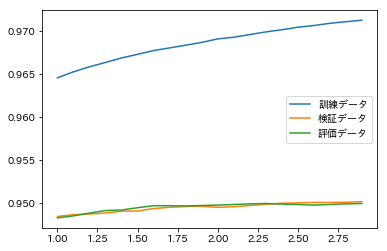

In [42]:
X_train_vec_conti = X_train["CATEGORY"]
X_valid_vec_conti = X_valid["CATEGORY"]
X_test_vec_conti = X_test["CATEGORY"]

x_vec = []
y_train_vec = []
y_valid_vec = []
y_test_vec = []

for i in range(10,30,1):
    x_vec.append(round(i*0.1,2))

for i in x_vec:
    
    LR_vec_conti = LogisticRegression(penalty = "l2", C = i)
    
    #学習
    LR_vec_conti.fit(X_train_vec,X_train_vec_conti)
    
    #予想
    predict_train_vec_conti = LR_vec_conti.predict(X_train_vec)
    predict_valid_vec_conti = LR_vec_conti.predict(X_valid_vec)
    predict_test_vec_conti = LR_vec_conti.predict(X_test_vec)
    
    #正答率の保存
    score_train_vec = metrics.accuracy_score(predict_train_vec_conti, X_train_vec_conti)
    score_valid_vec = metrics.accuracy_score(predict_valid_vec_conti, X_valid_vec_conti)
    score_test_vec = metrics.accuracy_score(predict_test_vec_conti, X_test_vec_conti)
    
    #配列に保存(pltでは、配列に格納したほうが楽)
    y_train_vec.append(score_train_vec)
    y_valid_vec.append(score_valid_vec)
    y_test_vec.append(score_test_vec)
    
plt.plot(x_vec,y_train_vec,label="訓練データ")
plt.plot(x_vec,y_valid_vec,label="検証データ")
plt.plot(x_vec,y_test_vec,label="評価データ")
plt.legend()
plt.show()

In [21]:
import keras
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

Using TensorFlow backend.


c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

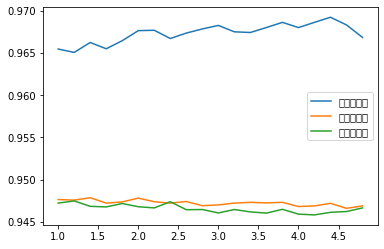

In [24]:
X_train_vec_conti = X_train["CATEGORY"]
X_valid_vec_conti = X_valid["CATEGORY"]
X_test_vec_conti = X_test["CATEGORY"]

x_vec = []
y_train_vec = []
y_valid_vec = []
y_test_vec = []

for i in range(10,50,2):
    x_vec.append(round(i*0.1,2))

for i in x_vec:
    
    LR_vec_conti = LogisticRegression(penalty = "l2", C = i)
    
    #学習
    LR_vec_conti.fit(X_train_vec,X_train_vec_conti)
    
    #予想
    predict_train_vec_conti = LR_vec_conti.predict(X_train_vec)
    predict_valid_vec_conti = LR_vec_conti.predict(X_valid_vec)
    predict_test_vec_conti = LR_vec_conti.predict(X_test_vec)
    
    #正答率の保存
    score_train_vec = metrics.accuracy_score(predict_train_vec_conti, X_train_vec_conti)
    score_valid_vec = metrics.accuracy_score(predict_valid_vec_conti, X_valid_vec_conti)
    score_test_vec = metrics.accuracy_score(predict_test_vec_conti, X_test_vec_conti)
    
    #配列に保存(pltでは、配列に格納したほうが楽)
    y_train_vec.append(score_train_vec)
    y_valid_vec.append(score_valid_vec)
    y_test_vec.append(score_test_vec)
    
plt.plot(x_vec,y_train_vec,label="訓練データ")
plt.plot(x_vec,y_valid_vec,label="検証データ")
plt.plot(x_vec,y_test_vec,label="評価データ")
plt.legend()
plt.show()

c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

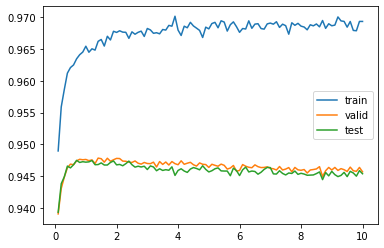

11.940596690177918


In [22]:
import time

X_train_vec_conti = X_train["CATEGORY"]
X_valid_vec_conti = X_valid["CATEGORY"]
X_test_vec_conti = X_test["CATEGORY"]

x_vec = []
time_process=[]
y_train_vec = []
y_valid_vec = []
y_test_vec = []

for i in range(1,101,1):
    x_vec.append(round(i*0.1,2))

for i in x_vec:
    
    #処理時間の計測
    start = time.time()
    
    LR_vec_conti = LogisticRegression(penalty = "l2", C = i)
    
    #学習
    LR_vec_conti.fit(X_train_vec,X_train_vec_conti)
    
    #予想
    predict_train_vec_conti = LR_vec_conti.predict(X_train_vec)
    predict_valid_vec_conti = LR_vec_conti.predict(X_valid_vec)
    predict_test_vec_conti = LR_vec_conti.predict(X_test_vec)
    
    #正答率の保存
    score_train_vec = metrics.accuracy_score(predict_train_vec_conti, X_train_vec_conti)
    score_valid_vec = metrics.accuracy_score(predict_valid_vec_conti, X_valid_vec_conti)
    score_test_vec = metrics.accuracy_score(predict_test_vec_conti, X_test_vec_conti)
    
    #配列に保存(pltでは、配列に格納したほうが楽)
    y_train_vec.append(score_train_vec)
    y_valid_vec.append(score_valid_vec)
    y_test_vec.append(score_test_vec)
    
    #処理時間の計測
    process_time = time.time() - start
    time_process.append(process_time)
    
plt.plot(x_vec,y_train_vec,label="train")
plt.plot(x_vec,y_valid_vec,label="valid")
plt.plot(x_vec,y_test_vec,label="test")
plt.legend()
plt.show()
#処理時間の表示
print(sum(time_process)/len(time_process))

c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

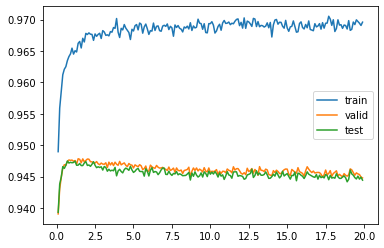

12.606853232311844


In [29]:
import time

X_train_vec_conti = X_train["CATEGORY"]
X_valid_vec_conti = X_valid["CATEGORY"]
X_test_vec_conti = X_test["CATEGORY"]

x_vec = []
time_process=[]
y_train_vec = []
y_valid_vec = []
y_test_vec = []

for i in range(1,200,1):
    x_vec.append(round(i*0.1,2))

for i in x_vec:
    
    #処理時間の計測
    start = time.time()
    
    LR_vec_conti = LogisticRegression(penalty = "l2", C = i)
    
    #学習
    LR_vec_conti.fit(X_train_vec,X_train_vec_conti)
    
    #予想
    predict_train_vec_conti = LR_vec_conti.predict(X_train_vec)
    predict_valid_vec_conti = LR_vec_conti.predict(X_valid_vec)
    predict_test_vec_conti = LR_vec_conti.predict(X_test_vec)
    
    #正答率の保存
    score_train_vec = metrics.accuracy_score(predict_train_vec_conti, X_train_vec_conti)
    score_valid_vec = metrics.accuracy_score(predict_valid_vec_conti, X_valid_vec_conti)
    score_test_vec = metrics.accuracy_score(predict_test_vec_conti, X_test_vec_conti)
    
    #配列に保存(pltでは、配列に格納したほうが楽)
    y_train_vec.append(score_train_vec)
    y_valid_vec.append(score_valid_vec)
    y_test_vec.append(score_test_vec)
    
    #処理時間の計測
    process_time = time.time() - start
    time_process.append(process_time)
    
plt.plot(x_vec,y_train_vec,label="train")
plt.plot(x_vec,y_valid_vec,label="valid")
plt.plot(x_vec,y_test_vec,label="test")
plt.legend()
plt.show()
#処理時間の表示
print(sum(time_process)/len(time_process))

c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

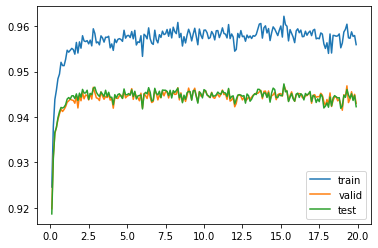

12.217718798910553


In [23]:
#tf-idfの場合
import time

X_train_tfidf_conti = X_train["CATEGORY"]
X_valid_tfidf_conti = X_valid["CATEGORY"]
X_test_tfidf_conti = X_test["CATEGORY"]

x_tfidf = []
time_process=[]
y_train_tfidf = []
y_valid_tfidf = []
y_test_tfidf = []

for i in range(1,200,1):
    x_tfidf.append(round(i*0.1,2))

for i in x_tfidf:
    
    #処理時間の計測
    start = time.time()
    
    LR_tfidf_conti = LogisticRegression(penalty = "l2", C = i)
    
    #学習
    LR_tfidf_conti.fit(X_train_tfidf,X_train_tfidf_conti)
    
    #予想
    predict_train_tfidf_conti = LR_tfidf_conti.predict(X_train_tfidf)
    predict_valid_tfidf_conti = LR_tfidf_conti.predict(X_valid_tfidf)
    predict_test_tfidf_conti = LR_tfidf_conti.predict(X_test_tfidf)
    
    #正答率の保存
    score_train_tfidf = metrics.accuracy_score(predict_train_tfidf_conti, X_train_tfidf_conti)
    score_valid_tfidf = metrics.accuracy_score(predict_valid_tfidf_conti, X_valid_tfidf_conti)
    score_test_tfidf = metrics.accuracy_score(predict_test_tfidf_conti, X_test_tfidf_conti)
    
    #配列に保存(pltでは、配列に格納したほうが楽)
    y_train_tfidf.append(score_train_tfidf)
    y_valid_tfidf.append(score_valid_tfidf)
    y_test_tfidf.append(score_test_tfidf)
    
    #処理時間の計測
    process_time = time.time() - start
    time_process.append(process_time)
    
plt.plot(x_tfidf,y_train_tfidf,label="train")
plt.plot(x_tfidf,y_valid_tfidf,label="valid")
plt.plot(x_tfidf,y_test_tfidf,label="test")
plt.legend()
plt.show()
#処理時間の表示
print(sum(time_process)/len(time_process))

## 第59問

In [ ]:
#学習方法はアンサンブル学習やXGBoostなど複数
#今のパラメータ等は、よくわからないので
#グリッドサーチ等で探し出す必要がある。

In [28]:
#学習方法1 XGBoost 回帰 vec(論文で見て、やってみたかったし)
import keras
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

import xgboost as xgb
from sklearn.model_selection import GridSearchCV

X_train_vec_C = X_train["CATEGORY"]
X_valid_vec_C = X_valid["CATEGORY"]
X_test_vec_C = X_test["CATEGORY"]

#学習モデルをセット
model = xgb.XGBRegressor()
#ハイパーパラメータチューニング
model_cv = GridSearchCV(model,{'max_depth': [2,4,6], 'n_estimators': [50,100,200]}, verbose=1)
#学習
model_cv.fit(X_train_vec,X_train_vec_C)
print(model_cv.best_params_)
print(model_cv.best_score_)

#最適パラメータで再度学習
model = model_cv.best_estimator_
model.fit(X_test_vec,X_test_vec_C)

predict_test_vec = model.predict(X_test_vec)
print("正解率",metrics.accuracy_score(predict_test_vec, X_test_vec_C))

test_result = pd.DataFrame({"Predict":predict_test_vec,"Real":X_test_vec_C})
test_result.to_csv("Part6_Result/XGBoost_Regression_vec.csv",index=False)

Using TensorFlow backend.


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  5.8min finished


{'max_depth': 6, 'n_estimators': 200}
0.6616368543400053


ValueError: Classification metrics can't handle a mix of continuous and multiclass targets

In [24]:
#学習方法1 XGBoost 分類　vec(論文で見て、やってみたかったし)
import keras
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

import xgboost as xgb
from sklearn.model_selection import GridSearchCV

X_train_vec_C = X_train["CATEGORY"]
X_valid_vec_C = X_valid["CATEGORY"]
X_test_vec_C = X_test["CATEGORY"]

#学習モデルをセット
model = xgb.XGBClassifier()
#ハイパーパラメータチューニング
model_cv = GridSearchCV(model,{'max_depth': range(1,11,1), 'n_estimators': range(0,60,10)}, verbose=1)
#学習
model_cv.fit(X_train_vec,X_train_vec_C)
print(model_cv.best_params_)
print(model_cv.best_score_)

#最適パラメータで再度学習
model = model_cv.best_estimator_
model.fit(X_test_vec,X_test_vec_C)

predict_test_vec = model.predict(X_test_vec)
print("正解率",metrics.accuracy_score(predict_test_vec, X_test_vec_C))

test_result = pd.DataFrame({"Predict":predict_test_vec,"Real":X_test_vec_C})
test_result.to_csv("Part6_Result/XGBoost_Regression_vec.csv",index=False)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 52.6min finished


{'max_depth': 10, 'n_estimators': 50}
0.8428514359270274
正解率 0.8505279106102931


In [29]:
#学習方法2 Random Forest0 分類　vec(論文で見て、やってみたかったし)
import keras
import tensorflow as tf

#import os
#os.environ["CUDA_VISIBLE_DEVICES"]="0","1","2"

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

X_train_vec_C = X_train["CATEGORY"]
X_valid_vec_C = X_valid["CATEGORY"]
X_test_vec_C = X_test["CATEGORY"]

#学習モデルをセット
model = RandomForestClassifier(random_state=0)
#ハイパーパラメータチューニング
model_cv = GridSearchCV(model,{"n_estimators": range(0,60,10)}, verbose=True)
#学習
model_cv.fit(X_train_vec,X_train_vec_C)
print(model_cv.best_params_)
print(model_cv.best_score_)

#最適パラメータで再度学習
model = model_cv.best_estimator_
model.fit(X_test_vec,X_test_vec_C)

predict_test_vec = model.predict(X_test_vec)
print("正解率",metrics.accuracy_score(predict_test_vec, X_test_vec_C))

test_result = pd.DataFrame({"Predict":predict_test_vec,"Real":X_test_vec_C})
test_result.to_csv("Part6_Result/RandomForest_Regression_vec.csv",index=False)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, go

{'n_estimators': 50}
0.9210942932812524
正解率 0.999147767624639


In [1]:
import keras
import tensorflow as tf
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

Using TensorFlow backend.


In [22]:
#学習方法3 K近傍法 分類　vec(論文で見て、やってみたかったし)
#起動時間が長すぎ。後回し
#1回調べるのに、40分とかかかるので

import time

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

X_train_vec_C = X_train["CATEGORY"]
X_valid_vec_C = X_valid["CATEGORY"]
X_test_vec_C = X_test["CATEGORY"]

param_gs_knn = {"est_n_neighbors": range(1,4,1),
                "est_weights": ["uniform","distance"],
                "est_algorithm" : ["auto"],
                "est_p": range(1,3,1)}

best_score = 0
best_params = {}

for a in param_gs_knn["est_n_neighbors"]:
    for b in param_gs_knn["est_weights"]:
        for c in param_gs_knn["est_algorithm"]:
            for d in param_gs_knn["est_p"]:
                
                start = time.time()
                
                #学習モデルをセット
                model = KNeighborsClassifier(n_neighbors = a, weights = b, algorithm = c, p = d, n_jobs = -1)
                #ハイパーパラメータチューニング
                scores = cross_val_score(model, X_train_vec, X_train_vec_C)
                score = np.mean(scores)
                
                if best_score < score:
                    best_score = score
                    best_params = {"est_n_neighbors": a,
                                   "est_weights": b,
                                   "est_algorithm" : c,
                                   "est_p": d
                }
                
                finish = time.time()
                p_time = finish - start
                
                print(p_time)
                       
print(best_score)
print(best_params)


#最適パラメータで再度学習
model = KNeighborsClassifier(n_neighbors = best_params["est_n_neighbors"], weights = best_params["est_weights"], algorithm = best_params["est_algorithm"], p = best_params["est_p"], n_jobs = -1)
model.fit(X_test_vec,X_test_vec_C)

predict_test_vec = model.predict(X_test_vec)
print("正解率",metrics.accuracy_score(predict_test_vec, X_test_vec_C))

test_result = pd.DataFrame({"Predict":predict_test_vec,"Real":X_test_vec_C})
test_result.to_csv("Part6_Result/KNeighbor_vec.csv",index=False)

2319.7512724399567
1814.8875393867493
2289.7750129699707
1779.6667702198029
2353.618625164032
1843.4213316440582
2355.1891226768494
1845.620430469513
2419.6283123493195
1914.0564386844635
2419.270229101181
1903.9494984149933
0.8742036190391644
{'est_n_neighbors': 3, 'est_weights': 'distance', 'est_algorithm': 'auto', 'est_p': 1}
正解率 0.9992187869892524


In [30]:

#学習方法1 XGBoost 分類　vec(論文で見て、やってみたかったし)
#学習データをvalidにし、評価をtestにした。(問題の本意？)

import keras
import tensorflow as tf

#import os
#os.environ["CUDA_VISIBLE_DEVICES"]="0","1","2"

import xgboost as xgb
from sklearn.model_selection import GridSearchCV

X_train_vec_C = X_train["CATEGORY"]
X_valid_vec_C = X_valid["CATEGORY"]
X_test_vec_C = X_test["CATEGORY"]

#学習モデルをセット
model = xgb.XGBClassifier()
#ハイパーパラメータチューニング
model_cv = GridSearchCV(model,{'max_depth': range(1,16,1), 'n_estimators': range(0,60,10)}, verbose=1)
#学習
model_cv.fit(X_valid_vec,X_valid_vec_C)
print(model_cv.best_params_)
print(model_cv.best_score_)

#最適パラメータで再度学習
model = model_cv.best_estimator_
model.fit(X_test_vec,X_test_vec_C)

predict_test_vec = model.predict(X_test_vec)
print("正解率",metrics.accuracy_score(predict_test_vec, X_test_vec_C))

test_result = pd.DataFrame({"Predict":predict_test_vec,"Real":X_test_vec_C})
test_result.to_csv("Part6_Result/XGBoost_Regression_validtest_vec.csv",index=False)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed: 63.6min finished


{'max_depth': 15, 'n_estimators': 50}
0.8485629210871288
正解率 0.8819894891340372


In [32]:
#学習方法2 Random Forest0 分類　vec(論文で見て、やってみたかったし)
#学習データをvalidにし、評価をtestにした。(問題の本意？)

import keras
import tensorflow as tf

#import os
#os.environ["CUDA_VISIBLE_DEVICES"]="0","1","2"

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

X_train_vec_C = X_train["CATEGORY"]
X_valid_vec_C = X_valid["CATEGORY"]
X_test_vec_C = X_test["CATEGORY"]

#学習モデルをセット
model = RandomForestClassifier(random_state=0)
#ハイパーパラメータチューニング
model_cv = GridSearchCV(model,{"n_estimators": range(0,60,10)}, verbose=True)
#学習
model_cv.fit(X_valid_vec,X_valid_vec_C)
print(model_cv.best_params_)
print(model_cv.best_score_)

#最適パラメータで再度学習
model = model_cv.best_estimator_
model.fit(X_test_vec,X_test_vec_C)

predict_test_vec = model.predict(X_test_vec)
print("正解率",metrics.accuracy_score(predict_test_vec, X_test_vec_C))

test_result = pd.DataFrame({"Predict":predict_test_vec,"Real":X_test_vec_C})
test_result.to_csv("Part6_Result/RandomForest_Regression_validtest_vec.csv",index=False)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
c:\users\takumi takei\anaconda3\envs\py373\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, go

{'n_estimators': 50}
0.8680458867285712
正解率 0.999147767624639


In [26]:
#GPUが動くかの実験
import tensorflow as tf
mnist = tf.keras.datasets.mnist
 
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
 
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
 
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

11493376/11490434 [==============================] - 19s 2us/step
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.2188 - accuracy: 0.9348
Epoch 2/5
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0953 - accuracy: 0.9711
Epoch 3/5
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0675 - accuracy: 0.9788
Epoch 4/5
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0554 - accuracy: 0.9822
Epoch 5/5
10000/10000 [==============================] - 1s 53us/sample - loss: 0.0635 - accuracy: 0.9805


[0.06347054092912004, 0.9805]